In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import calendar

In [25]:
# Load and view dataframe
fireData = pd.read_csv("updatedFire.csv", index_col = "_id", low_memory = False)
fireData

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,Zip Code,* CAL FIRE Unit,County,* Incident Name,...,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Fire Name (Secondary),GLOBALID,Latitude,Longitude,x,y,Day,Month,Year
_id,,,,,,,,,,,,,,,,,,,,,
1,1,No Damage,8376.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,NaN,Quail,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06,6,6,2020
2,2,Affected (1-9%),8402.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,NaN,Quail,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06,6,6,2020
3,3,No Damage,8430.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,NaN,Quail,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06,6,6,2020
4,4,No Damage,3838.0,Putah Creek,Road,Winters,NaN,LNU,Solano,Quail,...,NaN,Quail,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06,6,6,2020
5,5,No Damage,3830.0,Putah Creek,Road,Winters,NaN,LNU,Solano,Quail,...,NaN,Quail,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06,6,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100226,101217,No Damage,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,NaN,NaN,1b537de2-8b97-43ee-9d5c-c5a426f604f1,34.033408,-118.700625,-1.321369e+07,4.033289e+06,9,12,2024
100227,101218,No Damage,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,NaN,NaN,56e3cc8b-4bf0-4beb-bd26-b54422cc31ee,34.033278,-118.700902,-1.321372e+07,4.033271e+06,9,12,2024
100228,101219,No Damage,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,NaN,NaN,f85e9f02-a67f-4a7d-9fa1-0b8bf419d51a,34.033618,-118.701102,-1.321375e+07,4.033317e+06,9,12,2024


In [26]:
unique_damage = fireData['* Damage'].unique()
print(unique_damage)

['No Damage' 'Affected (1-9%)' 'Minor (10-25%)' 'Destroyed (>50%)'
 'Major (26-50%)' 'Inaccessible']


In [27]:
# This makes the categorical values of damage column into numeric for bar chart
category_mapping = {
    'No Damage': 0,
    'Affected (1-9%)': 1,
    'Minor (10-25%)': 2,
    'Destroyed (>50%)': 3,
    'Major (26-50%)': 4,
    'Inaccessible': 5
}

fireData['* Damage'] = fireData['* Damage'].map(category_mapping)

In [28]:
unique_damage = fireData['* Damage'].unique()
print(unique_damage)

[0 1 2 3 4 5]


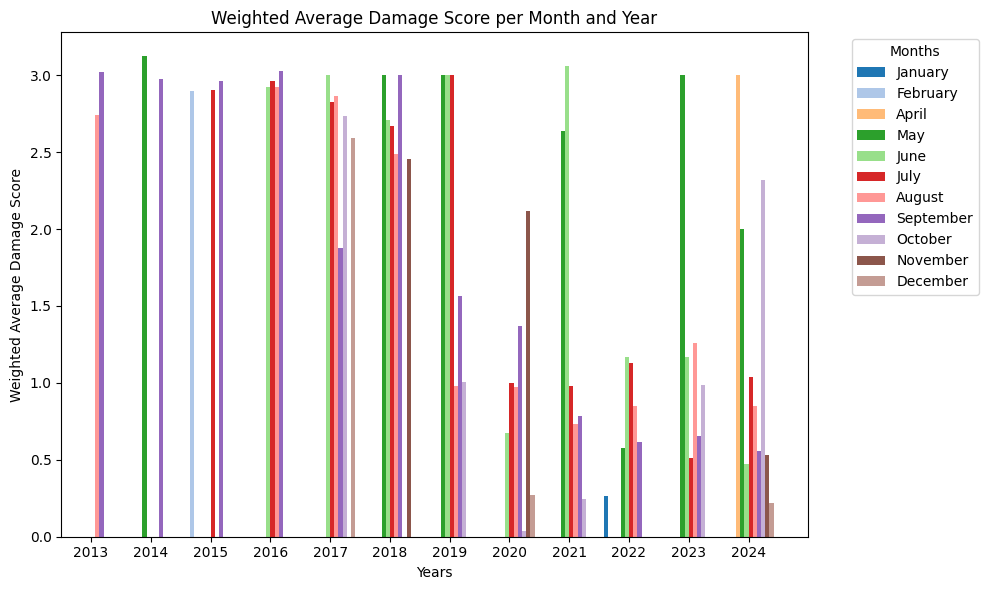

In [35]:
# Compute total damage per year, month
total_damage_per_year_month = fireData.groupby(['Year', 'Month'])['* Damage'].sum().unstack(fill_value=0)

# Get weighted average damager per year, month
fire_counts_per_year_month = fireData.groupby(['Year', 'Month']).size().unstack(fill_value=0)
weighted_avg_damage_per_year_month = total_damage_per_year_month / fire_counts_per_year_month.replace(0, np.nan)


# Define positions for grouped bars
years = weighted_avg_damage_per_year_month.index
months = np.arange(1, 13)  # Months 1-12
width = 0.07  # Width of each bar
x = np.arange(len(years))  # X positions for groups

# Create a colormap for months
cmap = plt.colormaps.get_cmap('tab20')
colors = [cmap(i) for i in range(12)]  # Extract 12 distinct colors

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, month in enumerate(months):
    if month in weighted_avg_damage_per_year_month.columns:
        ax.bar(x + (i - 5.5) * width,  # Offset bars for grouping
               weighted_avg_damage_per_year_month[month], 
               width=width, 
               label=calendar.month_name[month],  # Use full month name
               color=colors[month-1])  # Correctly assign color

# X-axis labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_xlabel("Years")
ax.set_ylabel("Weighted Average Damage Score")
ax.set_title("Weighted Average Damage Score per Month and Year")
ax.legend(title="Months", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()